# ***Airbnb***

* Airbnb: “Air Bed and Breakfast”
* A service that lets property owners rent out their spaces to travelers looking for a place to stay.
* Travelers can rent a space for multiple people to share, a shared space with private rooms, or the entire property for themselves.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Import Libraries***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

# ***Load Dataset***

In [ ]:
# change float format
pd.options.display.float_format = '{:,.2f}'.format

# ***Check Missing Data***

In [ ]:
# check for missing values.
df.isnull().mean() * 100

,0
id,0.00
name,0.03
host_id,0.00
host_name,0.04
neighbourhood_group,0.00
neighbourhood,0.00
latitude,0.00
longitude,0.00
room_type,0.00
price,0.00


### 1.

In [ ]:
# Drop columns that are not useful in Analysis and EDA
df.drop(['id', 'name', 'host_name'], axis=1, inplace=True)

### 2.

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])
df.last_review.min(), df.last_review.max()

(Timestamp('2011-03-28 00:00:00'), Timestamp('2019-07-08 00:00:00'))

In [ ]:
# fill missing values with the minimum date (Just a convention)
df.last_review.fillna(df.last_review.min(), inplace=True)

/tmp/ipython-input-548150118.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.last_review.fillna(df.last_review.min(), inplace=True)


In [ ]:
df.reviews_per_month.fillna(df.reviews_per_month.min(), inplace=True)

/tmp/ipython-input-2699517829.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.reviews_per_month.fillna(df.reviews_per_month.min(), inplace=True)


In [ ]:
df.isnull().sum()

,0
host_id,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
last_review,0


# Dealing with Outliers
price

minimum_nights

number_of_reviews

reviews_per_month

calculated_host_listings_count

In [ ]:
col_for_outlier = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']

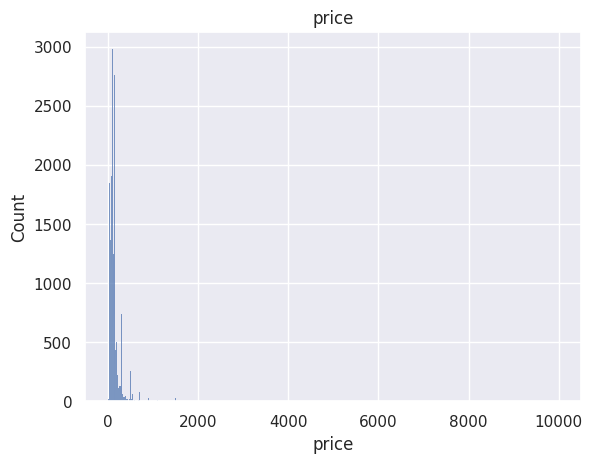

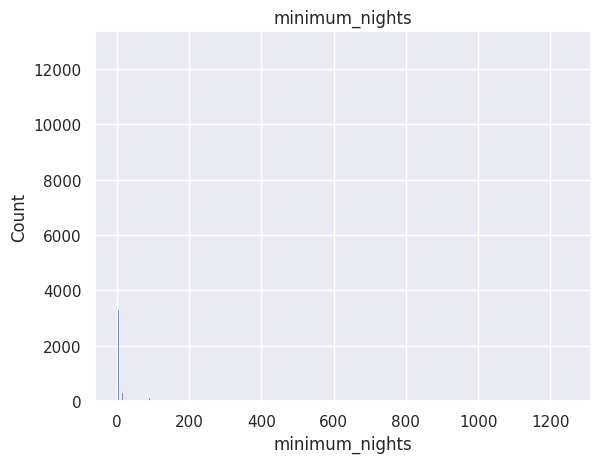

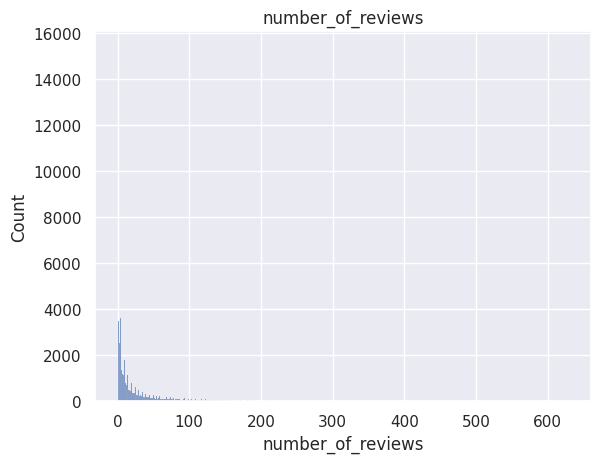

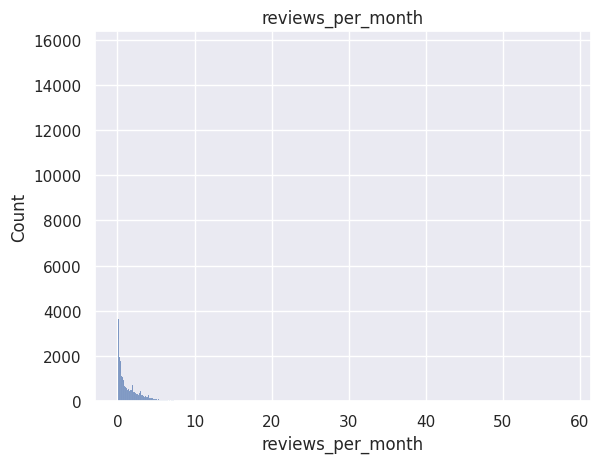

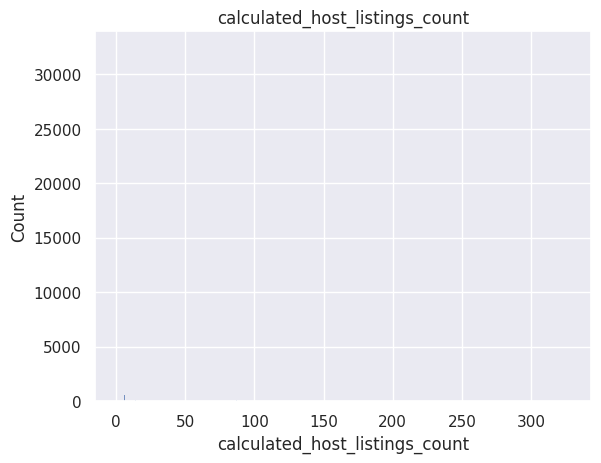

In [ ]:
for col in col_for_outlier:
    plt.figure()
    sns.histplot(df[col])
    plt.title(col)
    plt.show()


In [ ]:
df.minimum_nights = df.minimum_nights.clip(upper=30)

In [ ]:
df = df[(df.price < 10000) & (df.reviews_per_month <30) & (df.calculated_host_listings_count<200)]

In [ ]:
df.minimum_nights.describe()

,minimum_nights
count,"48,332.00"
mean,5.79
std,8.47
min,1.00
25%,1.00
50%,2.00
75%,5.00
max,30.00


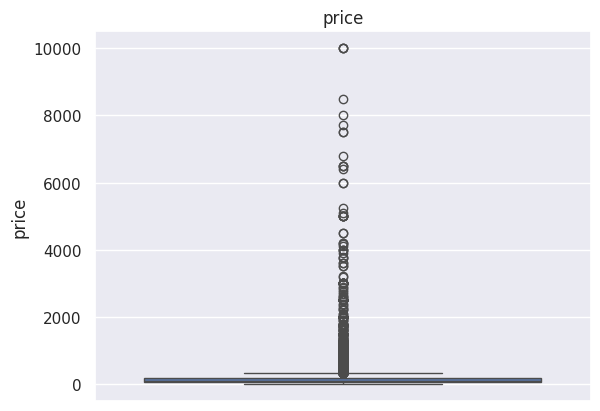

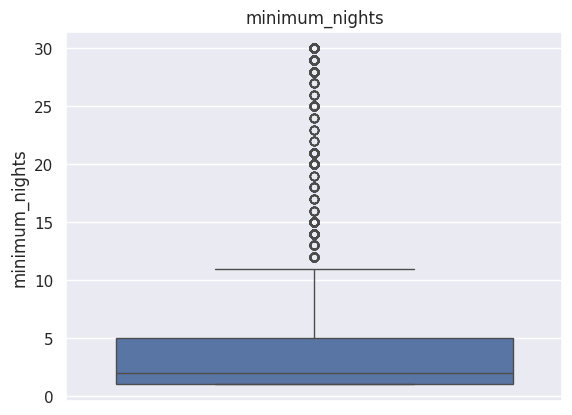

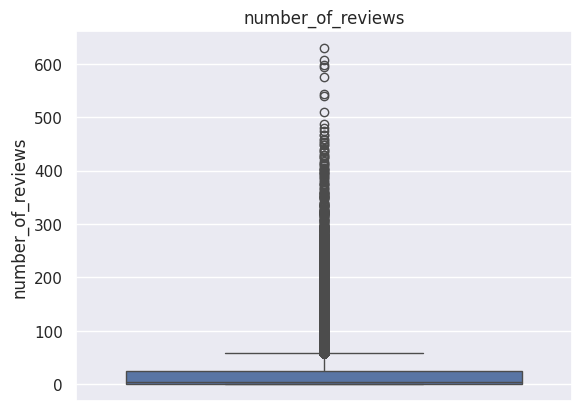

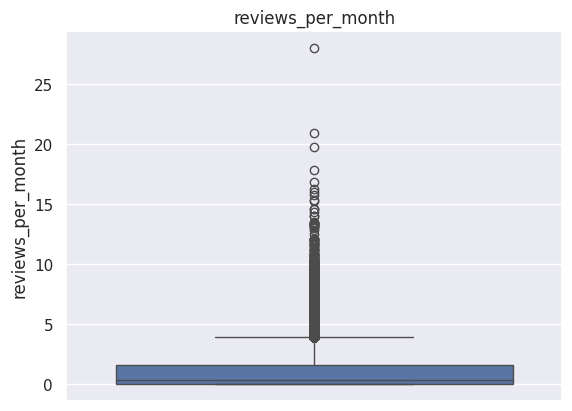

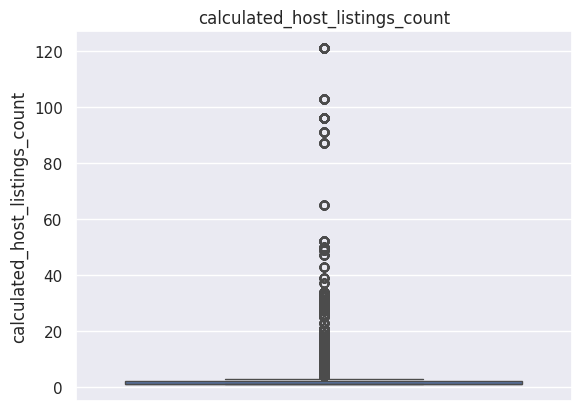

In [ ]:
for col in col_for_outlier:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

# Neighbourhood Analysis

In [ ]:
# categorical variables
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

['neighbourhood_group', 'neighbourhood', 'room_type']

In [ ]:
# explore categorical variables
for col in cat_cols:
    print(f'{col}: {df[col].nunique()}')


neighbourhood_group: 5
neighbourhood: 221
room_type: 3


In [ ]:
# explore neighbourhood_group
df.neighbourhood_group.value_counts()

,count
neighbourhood_group,
Manhattan,21102
Brooklyn,20101
Queens,5665
Bronx,1091
Staten Island,373


In [ ]:
nhg_pct = df.neighbourhood_group.value_counts(normalize = True)
nhg_pct

,proportion
neighbourhood_group,
Manhattan,0.44
Brooklyn,0.42
Queens,0.12
Bronx,0.02
Staten Island,0.01


In [ ]:
px.pie(nhg_pct, values=nhg_pct.values, names=nhg_pct.index, title='Neighbourhood Group')

# ***Median for Price***

In [ ]:
room_neighbour_prices= df.groupby(['neighbourhood_group', 'room_type'])['price'].median().sort_values(ascending=False).reset_index()

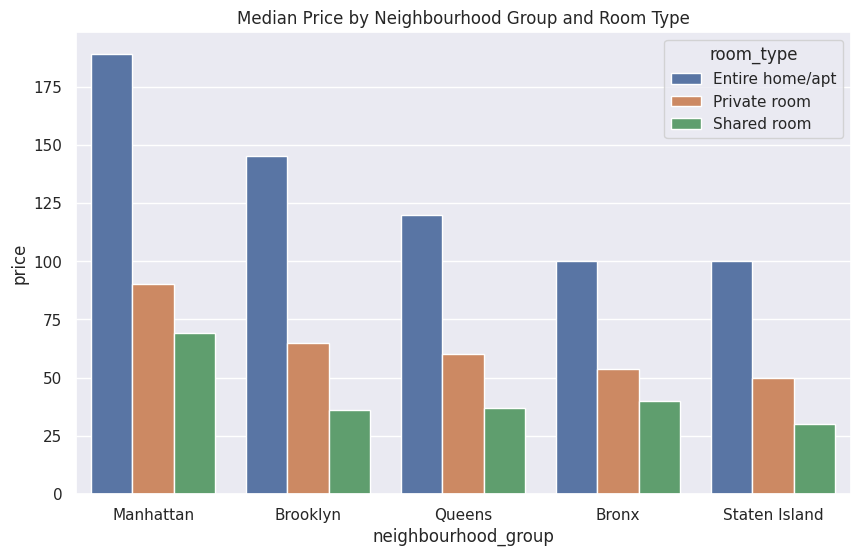

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=room_neighbour_prices, order=df.neighbourhood_group.value_counts().index);
plt.title('Median Price by Neighbourhood Group and Room Type')
plt.show()

In [ ]:
# facetgrid
fig = px.histogram(df, x='neighbourhood_group', y='price', color='room_type', facet_col='room_type', facet_col_wrap=3,
                category_orders={'neighbourhood_group': df.neighbourhood_group.value_counts().index}, histfunc='avg')
fig.show()

# ***Top 10 "neighbourhood" in price for every room type in NYC.***

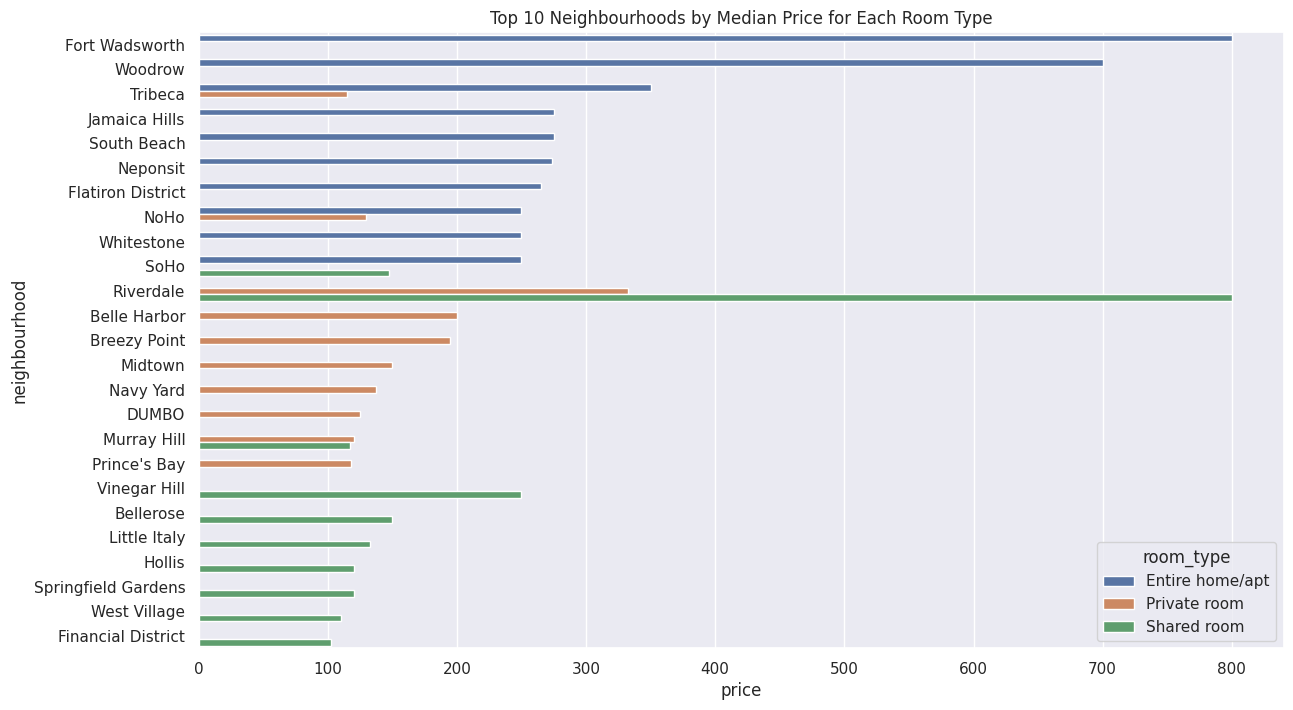

In [ ]:
top10_per_room = (df.groupby(['room_type', 'neighbourhood'])['price']
                    .median()
                    .reset_index()
                    .sort_values(['room_type','price'], ascending=[True, False]))

top10_per_room = top10_per_room.groupby('room_type').head(10)

plt.figure(figsize=(14,8))
sns.barplot(x='price', y='neighbourhood', hue='room_type', data=top10_per_room)
plt.title('Top 10 Neighbourhoods by Median Price for Each Room Type')
plt.show()

In [ ]:
nh_group_room = pd.pivot_table(df, index='neighbourhood_group', columns='room_type', values='price', aggfunc='median')
nh_group_room

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,100.00,53.50,40.00
Brooklyn,145.00,65.00,36.00
Manhattan,189.00,90.00,69.00
Queens,120.00,60.00,37.00
Staten Island,100.00,50.00,30.00


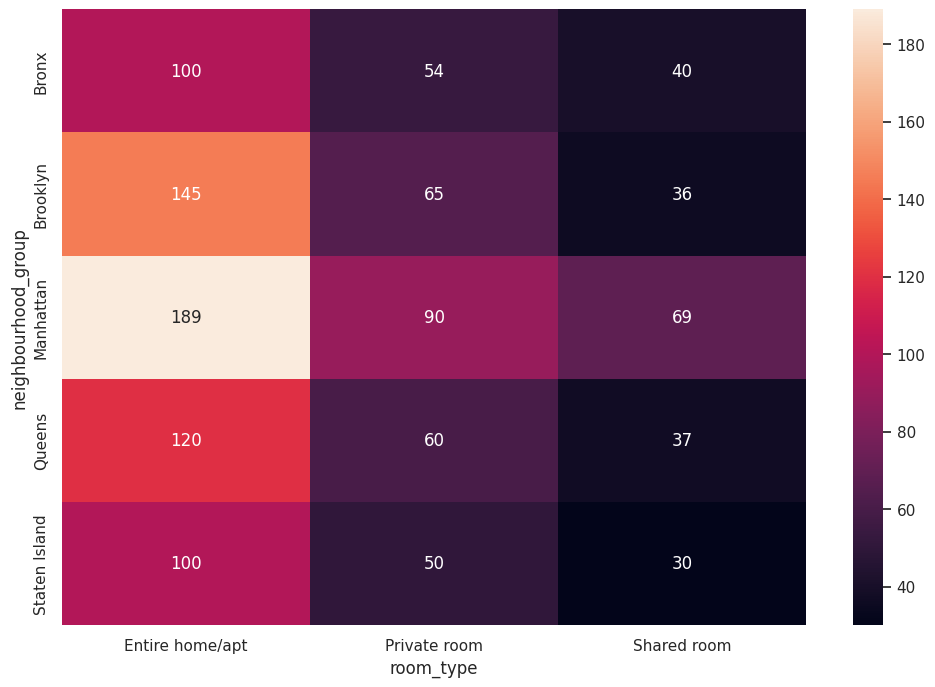

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(nh_group_room, annot=True, fmt='.0f');

* The most expensive neighbourhood: `Manhattan`, then `Brooklyn` (`Entire home/apt or Private room`)
* The least expensive neighbourhood: `Brooklyn` (`Shared room`)
                
      > In general you can specify the room type  first, if it has high priority, then compare the prices of the neighbourhoods. Or, you can specify the neighbourhood first, if it has high priority, then compares the price of the room types.


In [ ]:
df.neighbourhood.value_counts().nlargest(10)

,count
neighbourhood,
Williamsburg,3919
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1953
Hell's Kitchen,1933
East Village,1839
Upper East Side,1782
Crown Heights,1564


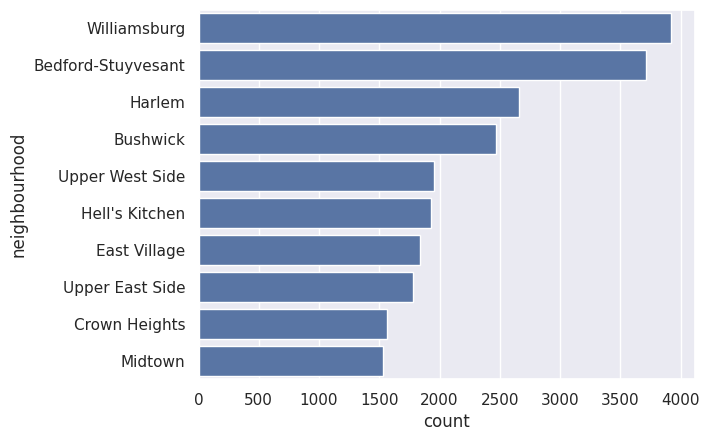

In [ ]:
sns.countplot(y='neighbourhood', data=df, order=df.neighbourhood.value_counts().nlargest(10).index);

In [ ]:
df.groupby('neighbourhood')['price'].median().nlargest(10)

,price
neighbourhood,
Fort Wadsworth,800.00
Woodrow,700.00
Tribeca,295.00
Neponsit,274.00
NoHo,250.00
Willowbrook,249.00
Flatiron District,225.00
Midtown,210.00
West Village,200.00


In [ ]:
df.groupby(['neighbourhood_group', 'neighbourhood'])['price'].median().nlargest(10)

neighbourhood_group  neighbourhood    
Staten Island        Fort Wadsworth      800.00
                     Woodrow             700.00
Manhattan            Tribeca             295.00
Queens               Neponsit            274.00
Manhattan            NoHo                250.00
Staten Island        Willowbrook         249.00
Manhattan            Flatiron District   225.00
                     Midtown             210.00
                     West Village        200.00
                     SoHo                199.00
Name: price, dtype: float64

In [ ]:
data = df.groupby(['neighbourhood_group', 'neighbourhood', 'room_type'])['price'].median().nlargest(10).reset_index()
data

,neighbourhood_group,neighbourhood,room_type,price
0,Bronx,Riverdale,Shared room,800.00
1,Staten Island,Fort Wadsworth,Entire home/apt,800.00
2,Staten Island,Woodrow,Entire home/apt,700.00
3,Manhattan,Tribeca,Entire home/apt,350.00
4,Bronx,Riverdale,Private room,332.50
5,Queens,Jamaica Hills,Entire home/apt,275.00
6,Staten Island,South Beach,Entire home/apt,275.00
7,Queens,Neponsit,Entire home/apt,274.00
8,Manhattan,Flatiron District,Entire home/apt,265.00
9,Brooklyn,Vinegar Hill,Shared room,250.00


In [ ]:
# Intersted in some city
def get_prices(city, max_price=200, room_type='Entire home/apt'):

    data = df[(df.neighbourhood_group == city) & (df.price < max_price) & (df.room_type == room_type)]
    data = data.groupby(['neighbourhood'])['price'].mean()
    return data

In [ ]:
get_prices('Manhattan', 500, 'Private room').nlargest(10)

,price
neighbourhood,
Midtown,192.08
NoHo,166.14
Theater District,143.19
West Village,132.10
Tribeca,129.13
Murray Hill,126.97
Hell's Kitchen,126.29
SoHo,124.99
Greenwich Village,123.95


In [ ]:
get_prices('Manhattan', 500, 'Private room').nsmallest(10)

,price
neighbourhood,
Washington Heights,66.10
Inwood,67.77
Harlem,77.55
Roosevelt Island,80.13
Morningside Heights,83.32
East Harlem,84.28
Marble Hill,87.29
Stuyvesant Town,90.04
Chinatown,95.01


In [ ]:
px.histogram(df, x='price', color='room_type')

# Host Analysis

In [ ]:
df.host_id.value_counts().nlargest(10)

,count
host_id,
30283594,121
137358866,103
12243051,96
16098958,96
61391963,91
22541573,87
200380610,65
7503643,52
1475015,52


# Location Analysis

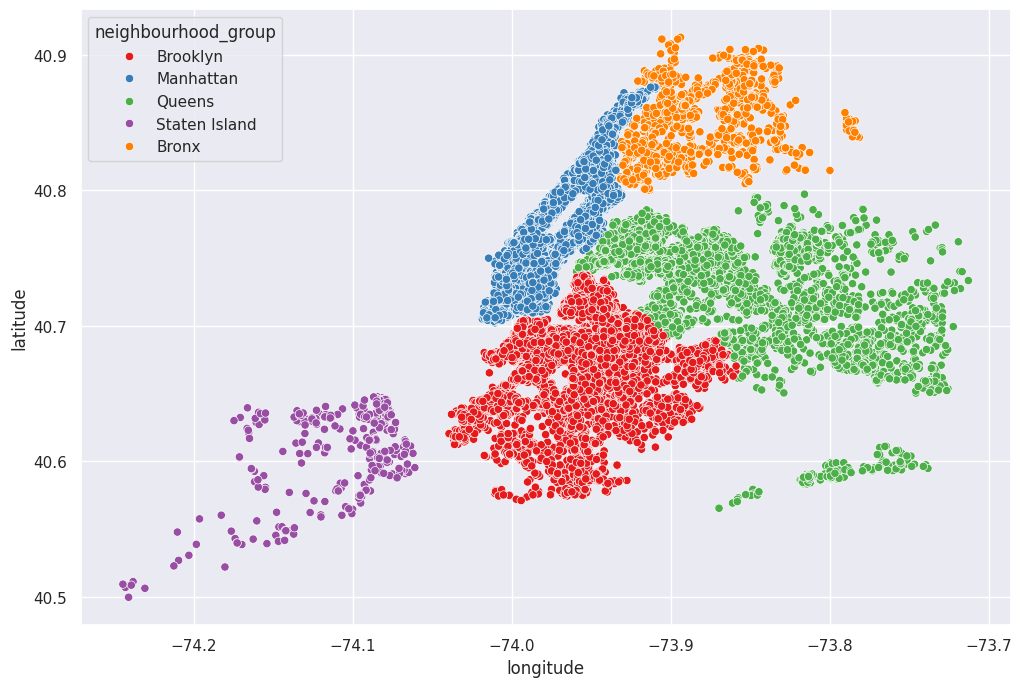

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='neighbourhood_group', palette='Set1');

# Price Analysis

In [ ]:
df.price.describe()

,price
count,"48,332.00"
mean,150.71
std,228.11
min,0.00
25%,69.00
50%,105.00
75%,175.00
max,"9,999.00"


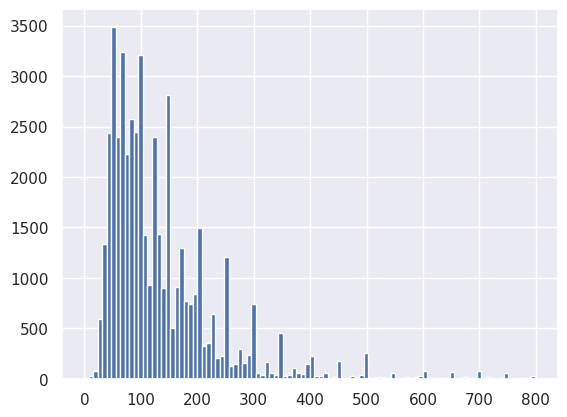

In [ ]:
df[df.price < 800].price.hist(bins=100);

In [ ]:
px.scatter(df[df.price>1000], x='longitude', y='latitude', color='neighbourhood_group', size='price', size_max=15, hover_name='neighbourhood')

# ***Price < 1000***

In [56]:
df_under_1000 = df[df.price < 1000]

df_under_1000.price.describe()


,price
count,"48,037.00"
mean,138.68
std,112.11
min,0.00
25%,69.00
50%,103.00
75%,175.00
max,999.00


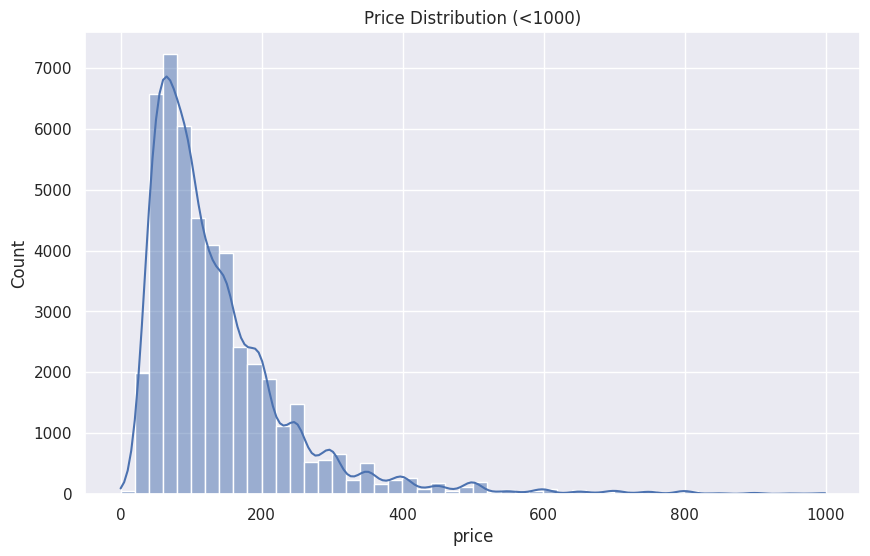

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(df_under_1000.price, bins=50, kde=True)
plt.title('Price Distribution (<1000)')
plt.show()

## ***Compare neighbourhood groups***

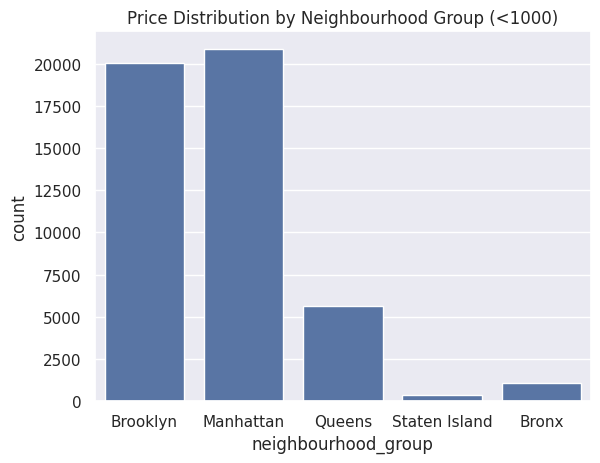

In [60]:
sns.countplot(x='neighbourhood_group', data=df_under_1000)
plt.title('Price Distribution by Neighbourhood Group (<1000)')
plt.show()

## ***Room type vs price***

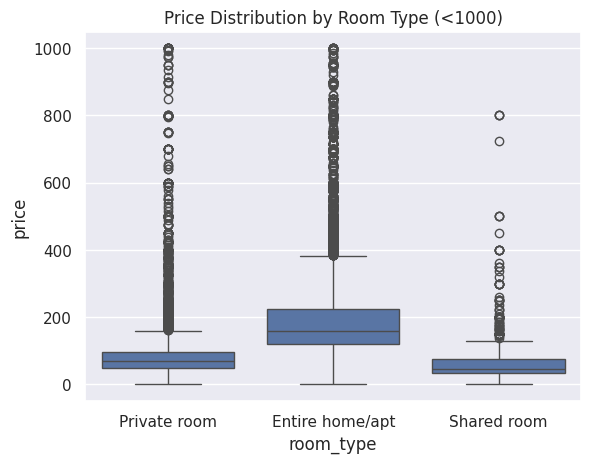

In [65]:
sns.boxplot(x='room_type', y='price', data=df_under_1000)
plt.title('Price Distribution by Room Type (<1000)')
plt.show()

# Availability Analysis

In [ ]:
df.availability_365.value_counts()

,count
availability_365,
0,17531
365,1284
364,491
1,402
89,361
...,...
195,26
183,24
196,23


# Minimum Nights Analysis

In [ ]:
df.minimum_nights.value_counts()

,count
minimum_nights,
1,12719
2,11506
3,7999
30,4273
4,3303
5,3033
7,2058
6,752
14,562


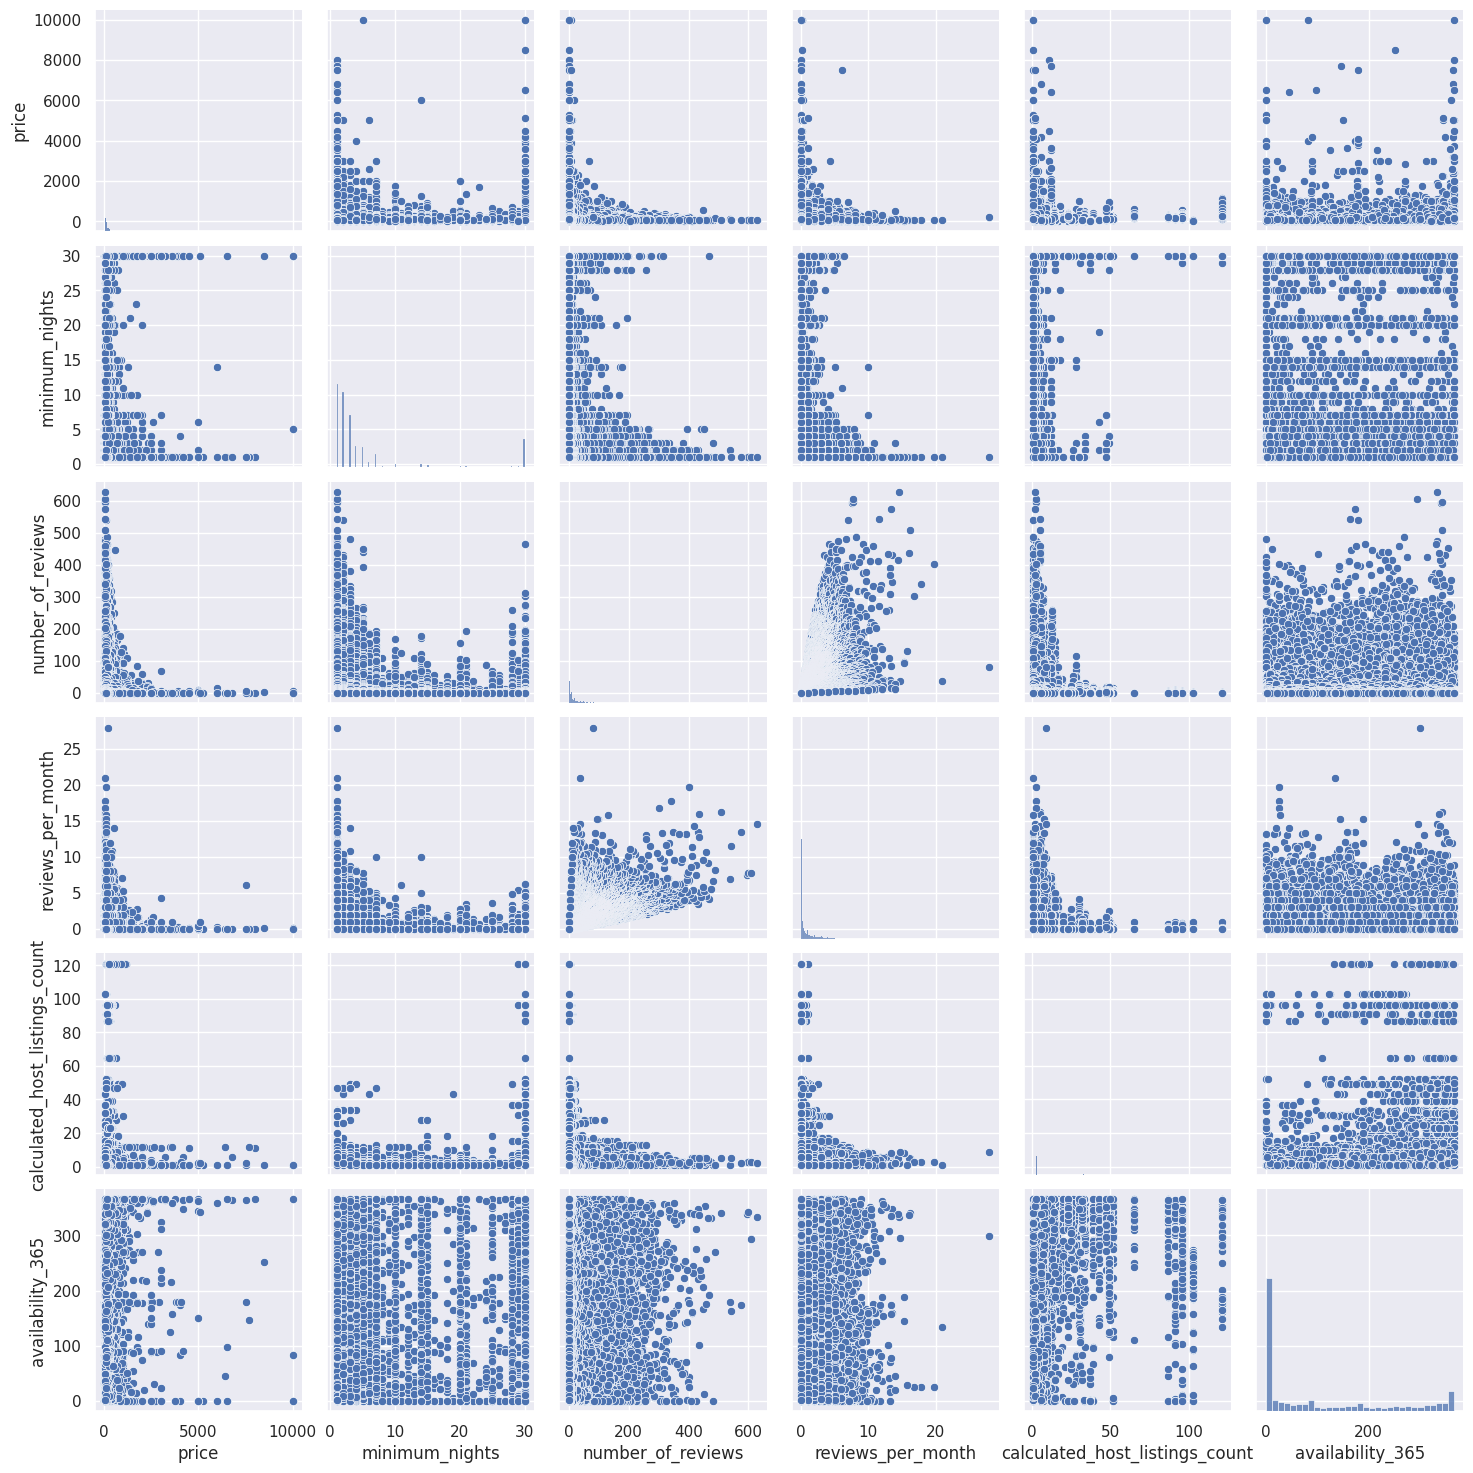

In [ ]:
sns.pairplot(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]);

In [ ]:
df.sort_values('number_of_reviews', ascending=False).head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,40.67,-73.77,Private room,47,1,629,2019-07-05,14.58,2,333
2031,4734398,Manhattan,Harlem,40.82,-73.94,Private room,49,1,607,2019-06-21,7.75,3,293
2030,4734398,Manhattan,Harlem,40.82,-73.94,Private room,49,1,597,2019-06-23,7.72,3,342
2015,4734398,Manhattan,Harlem,40.82,-73.94,Private room,49,1,594,2019-06-15,7.57,3,339
13495,47621202,Queens,Jamaica,40.67,-73.77,Private room,47,1,576,2019-06-27,13.40,2,173
10623,37312959,Queens,East Elmhurst,40.77,-73.88,Private room,46,1,543,2019-07-01,11.59,5,163
1879,2369681,Manhattan,Lower East Side,40.72,-73.99,Private room,99,2,540,2019-07-06,6.95,1,179
20403,26432133,Queens,East Elmhurst,40.76,-73.87,Private room,48,1,510,2019-07-06,16.22,5,341
4870,12949460,Brooklyn,Park Slope,40.68,-73.98,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,792159,Brooklyn,Bushwick,40.70,-73.92,Private room,60,3,480,2019-07-07,6.70,1,0


# ***"distance" column***

In [66]:
from geopy.distance import geodesic

city_center = (40.7128, -74.0060)

# Calculate distance from city center
df['distance'] = df.apply(lambda row: geodesic((row['latitude'], row['longitude']), city_center).km, axis=1)

df[['latitude','longitude','distance']].head()


,latitude,longitude,distance
0,40.65,-73.97,7.79
1,40.75,-73.98,4.91
2,40.81,-73.94,11.98
3,40.69,-73.96,4.97
4,40.80,-73.94,10.86


# ***distance analysis:***

In [67]:
df[['price', 'distance']].corr()

,price,distance
price,1.00,-0.15
distance,-0.15,1.00


* Negative Weak Correlation between distance and price but in general The far from the center of New York (Manhattan), the lower the prices.

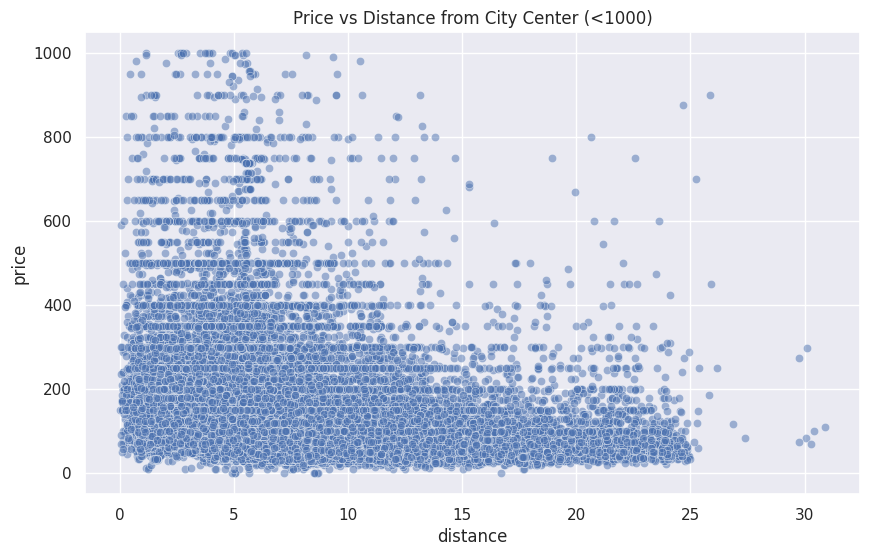

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='distance', y='price', data=df[df.price < 1000], alpha=0.5)
plt.title('Price vs Distance from City Center (<1000)')
plt.show()


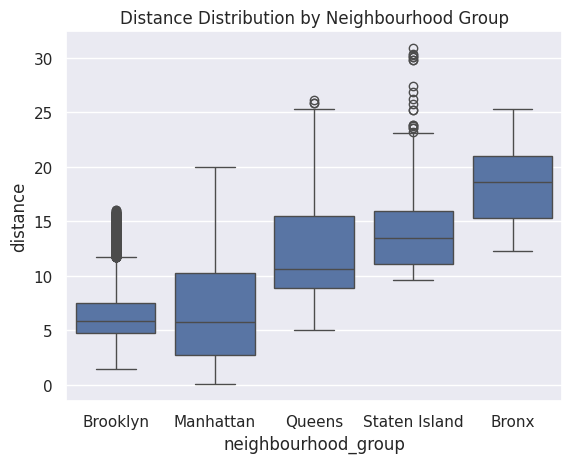

In [69]:
sns.boxplot(x='neighbourhood_group', y='distance', data=df)
plt.title('Distance Distribution by Neighbourhood Group')
plt.show()


# 📌 Key Insights from Airbnb NYC Analysis

1. **Prices**
   - Manhattan has the highest prices, especially for Entire home/apt.
   - Most listings are under $1000/night, but there are extreme outliers.

2. **Neighbourhoods**
   - Expensive: Manhattan, Brooklyn.
   - Cheapest: Staten Island.

3. **Room Types**
   - Entire home/apt is significantly more expensive.
   - Shared rooms are the cheapest option.

4. **Hosts**
   - A few hosts manage a very large number of properties (likely businesses or superhosts).

5. **Availability**
   - Most listings are either always available (365 days) or never available (0 days).

6. **Distance from City Center**
   - Weak negative correlation (-0.15) with price.
   - Closer properties tend to be more expensive, but many other factors matter too.

---

✅ Tasks to Complete:
1. Median instead of mean for Price aggregation.
2. Top 10 neighbourhoods by price for each room type (visualized).
3. Analysis restricted to Price < 1000.
4. New feature: Distance from city center using geopy.
5. Insights from the new Distance feature.
